## Definição do Problema de Negócio

A satisfação do cliente é uma medida fundamental de sucesso. Clientes 
insatisfeitos cancelam seus serviços e raramente expressam sua insatisfação antes 
de sair. Clientes satisfeitos, por outro lado, se tornam defensores da marca!
O Banco Santander está pedindo para ajudá-los a identificar clientes 
insatisfeitos no início do relacionamento. Isso permitiria que o Santander 
adotasse medidas proativas para melhorar a felicidade de um cliente antes que 
seja tarde demais.
Neste projeto de aprendizado de máquina, você trabalhará com centenas 
de recursos anônimos para prever se um cliente está satisfeito ou insatisfeito com 
sua experiência bancária.
Defina claramente o problema de negócio, faça a coleta e preparo dos 
dados, escolha um algoritmo, treine o modelo e avalie a acurácia, que deve ser de 
pelo menos 70%.

## Bibliotecas

In [1]:
# pip install imblearn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import pickle
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import NearMiss 
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier

%matplotlib inline
warnings.filterwarnings("ignore")

## Extraindo e Carregando os Dados

In [3]:
train_data = pd.read_csv('train.csv')

In [4]:
train_data.shape

(76020, 371)

In [5]:
train_data.dtypes

ID                                 int64
var3                               int64
var15                              int64
imp_ent_var16_ult1               float64
imp_op_var39_comer_ult1          float64
imp_op_var39_comer_ult3          float64
imp_op_var40_comer_ult1          float64
imp_op_var40_comer_ult3          float64
imp_op_var40_efect_ult1          float64
imp_op_var40_efect_ult3          float64
imp_op_var40_ult1                float64
imp_op_var41_comer_ult1          float64
imp_op_var41_comer_ult3          float64
imp_op_var41_efect_ult1          float64
imp_op_var41_efect_ult3          float64
imp_op_var41_ult1                float64
imp_op_var39_efect_ult1          float64
imp_op_var39_efect_ult3          float64
imp_op_var39_ult1                float64
imp_sal_var16_ult1               float64
ind_var1_0                         int64
ind_var1                           int64
ind_var2_0                         int64
ind_var2                           int64
ind_var5_0      

In [6]:
train_data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


## Análise Exploratória de Dados

In [7]:
train_data.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

O dataset não possui valores nulos.

In [8]:
resumo = train_data.describe()
resumo.to_excel('resumo_estatistico.xlsx') # Salva em excel para facilitar a visualizaacao das colunas  

In [9]:
resumo_transpose = resumo.T #inverte as linhas com as colunas para usar o .loc
resumo_transpose.loc[resumo_transpose['mean'] == 0]

,count,mean,std,min,25%,50%,75%,max
ind_var2_0,76020.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ind_var2,76020.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ind_var27_0,76020.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ind_var28_0,76020.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ind_var28,76020.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ind_var27,76020.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ind_var41,76020.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ind_var46_0,76020.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ind_var46,76020.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
num_var27_0,76020.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


As variaveis acima estão zeradas em todas as estatísticas, isso indica que elas não possuem valores diferentes de zero no dataset de treino. Podendo assim não apresentar relevancia no treinamento do modelo, por esse motivo elas serão removidas do dataset juntamento com a coluna ID.

In [10]:
remove_cols = list(resumo_transpose.loc[resumo_transpose['mean'] == 0].index)
remove_cols.append('ID')

In [11]:
data = train_data.drop(columns = remove_cols)
data.shape

(76020, 336)

In [12]:
#Verifica a distribuicao da variavel target
data.groupby('TARGET').size()

TARGET
0    73012
1     3008
dtype: int64

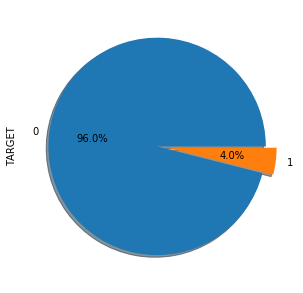

In [13]:
figure, axes = plt.subplots(figsize = (10,5))
data['TARGET'].value_counts().plot.pie(
    explode=[0,0.1],autopct='%1.1f%%',ax=axes,shadow=True
)

As classes estao desbalanceadas, sendo que 0 tem muito mais ocorrencias do que 1

In [14]:
data.duplicated().sum()

4807

O dataset possui 4807 valores duplicados

In [15]:
#remove os dados duplicados
data_sd = data.drop_duplicates()

## Feature Selection

In [16]:
#Utiliza Extra Tree Classifier - iremos remover as features menos importantes
x = data_sd.drop('TARGET', axis = 1)
y = data_sd['TARGET']

# Criação do Modelo - Feature Selection
modelo = ExtraTreesClassifier()
modelo.fit(x, y)

ExtraTreesClassifier()

In [17]:
importancia = pd.DataFrame({'colunas': x.columns, 'importancia': modelo.feature_importances_})
importancia.sort_values(by = 'importancia').values

array([['delta_imp_amort_var34_1y3', 0.0],
       ['ind_var13_medio', 0.0],
       ['num_reemb_var33_ult1', 0.0],
       ['delta_imp_trasp_var33_out_1y3', 0.0],
       ['ind_var18', 0.0],
       ['delta_imp_trasp_var17_out_1y3', 0.0],
       ['delta_imp_reemb_var33_1y3', 0.0],
       ['delta_imp_amort_var18_1y3', 0.0],
       ['saldo_var34', 0.0],
       ['imp_reemb_var33_ult1', 0.0],
       ['imp_trasp_var17_in_hace3', 0.0],
       ['saldo_var18', 0.0],
       ['imp_trasp_var33_in_hace3', 0.0],
       ['imp_trasp_var33_in_ult1', 0.0],
       ['num_var6', 0.0],
       ['imp_trasp_var33_out_ult1', 0.0],
       ['num_meses_var13_medio_ult3', 0.0],
       ['num_aport_var33_ult1', 0.0],
       ['num_var18', 0.0],
       ['saldo_medio_var13_medio_ult3', 0.0],
       ['delta_num_reemb_var33_1y3', 0.0],
       ['num_trasp_var17_in_hace3', 0.0],
       ['saldo_medio_var13_medio_hace2', 0.0],
       ['imp_amort_var34_ult1', 0.0],
       ['imp_aport_var33_ult1', 0.0],
       ['num_trasp_var33_in

In [18]:
importancia.loc[importancia.importancia == 0]

,colunas,importancia
35,ind_var13_medio,0.0
42,ind_var18,0.0
83,num_var6,0.0
101,num_var18,0.0
158,saldo_var18,0.0
168,saldo_var34,0.0
174,delta_imp_amort_var18_1y3,0.0
175,delta_imp_amort_var34_1y3,0.0
182,delta_imp_reemb_var33_1y3,0.0
184,delta_imp_trasp_var17_out_1y3,0.0


In [19]:
remove_colunas = importancia.loc[importancia.importancia == 0].colunas

In [20]:
#As variaveis classificadas com importancia igual a 0 serao removidas do dataset
data_sd.drop(columns = remove_colunas, inplace = True)

## Undersampling

Para equalizar as classes sera utilizado NearMiss que é um algoritmo de undersampling que consiste em reduzir de forma aleatória os exemplos da classe majoritária selecionando os exemplos com base na distância.

In [21]:
nearm = NearMiss()

In [22]:
x_under, y_under = nearm.fit_resample(x,y)

In [23]:
print('Shape de x: {} ; Shape de y: {}.'.format(x_under.shape, y_under.shape))

Shape de x: (5630, 335) ; Shape de y: (5630,).


In [24]:
y_under.value_counts()

1    2815
0    2815
Name: TARGET, dtype: int64

## Oversampling

Para equalizar as classes sera utilizado SMOTE que é um algoritmo de oversampling que consiste em aumentar  a quantidade de registros através da distancia entre as classes.

In [25]:
smote = SMOTE()
x,y = smote.fit_resample(x,y)
print('Shape de x: {} ; Shape de y: {}.'.format(x.shape, y.shape))

Shape de x: (136796, 335) ; Shape de y: (136796,).


In [26]:
y.value_counts()

1    68398
0    68398
Name: TARGET, dtype: int64

In [27]:
#Separa os dados em teste e treino
teste_size = 0.3
seed = 7

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = teste_size, random_state = seed)

In [28]:
X_train.shape

(95757, 335)

In [29]:
X_test.shape

(41039, 335)

## Normalização dos dados

In [30]:
#Normaliza os dados com MinMaxScaler() numa escal de 0 a 1
scaler = MinMaxScaler(feature_range = (0, 1))
rescaledX = scaler.fit_transform(X_train)
rescaledX

array([[9.99764056e-01, 2.22222222e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.80076567e-03],
       [9.99764056e-01, 1.81818182e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 3.21611243e-03],
       [9.99764056e-01, 2.22222222e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 3.90630234e-03],
       ...,
       [9.99772054e-01, 2.62626263e-01, 5.71428571e-04, ...,
        0.00000000e+00, 0.00000000e+00, 5.09075772e-03],
       [9.99764056e-01, 2.22222222e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 5.09075772e-03],
       [9.99764056e-01, 3.13131313e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 3.28755548e-03]])

## Reducao de dimensionalidade

In [31]:
pca = PCA(n_components = 5)
fit = pca.fit(rescaledX)

# Sumarizando os componentes
print("Variância: %s" % fit.explained_variance_ratio_)
fit.components_

Variância: [0.33788848 0.1685775  0.11975345 0.06764989 0.05860233]


array([[ 4.07452304e-04, -7.55395707e-03,  3.93875524e-04, ...,
         9.40512480e-05,  1.24581320e-04,  2.44208467e-04],
       [ 3.11224802e-04,  3.33268741e-02,  2.39843783e-04, ...,
         6.94457362e-05,  9.54817055e-05, -7.98683974e-05],
       [-1.20087697e-03, -2.26304115e-03,  7.63744462e-05, ...,
         2.58563766e-05,  3.63003456e-05, -1.46300926e-04],
       [ 1.06487560e-05,  6.28427032e-02,  8.05066298e-04, ...,
         7.07772746e-05,  1.12849709e-04,  4.80958204e-04],
       [-1.00228063e-06,  6.23231675e-02,  1.05659858e-03, ...,
         1.51398536e-05,  4.14991788e-05,  5.20221043e-04]])

In [32]:
#Aplica PCA aos dados
x_pca = pca.transform(rescaledX)
x_pca

array([[-1.31075319, -0.01467696,  0.71209861, -0.01823173,  0.07350446],
       [ 0.79391556, -0.42101416,  0.01396828, -0.02436969, -0.21405883],
       [-0.52354956,  0.02011939, -0.40634219, -0.01309879,  0.03633183],
       ...,
       [ 1.06354208, -0.36591941, -0.05462536, -0.00412114, -0.14205388],
       [ 0.53698423, -0.48373502, -0.07218683, -0.33014663, -0.23315489],
       [ 0.95636645, -0.47600869, -0.06363856, -0.06029461, -0.2172549 ]])

## Selecao do modelo utilizando Cross Validation

In [33]:
# numero de folds
num_folds = 10

# Modelos que serao testados
modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('NB', GaussianNB()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('XGB', XGBClassifier(verbosity = 0)))

# Variaveis para armazenar o resultado
resultados = []
nomes = []

#Encontra os resultados de cada modelo
for nome, modelo in modelos:
    kfold = KFold(n_splits = num_folds)
    cv_results = cross_validate(modelo, x_pca, Y_train, 
                                cv = kfold, scoring = ['accuracy', 'precision', 'recall', 'f1','roc_auc'])
    resultados.append(cv_results)
    nomes.append(nome)
    msg = "accuracy: {},  precision: {}, recall: {}, f1: {}, roc_auc: {} \n".format(cv_results['test_accuracy'].mean(),
                                                                                    cv_results['test_precision'].mean(),
                                                                                    cv_results['test_recall'].mean(),
                                                                                    cv_results['test_f1'].mean(),
                                                                                    cv_results['test_roc_auc'].mean())
    print(nome)
    print(msg)

LR
accuracy: 0.7548169695343667,  precision: 0.7491909861742907, recall: 0.7656957051094606, f1: 0.7573343852489371, roc_auc: 0.7614973668394046 

LDA
accuracy: 0.7537099853637574,  precision: 0.7473183590483815, recall: 0.7662178729833863, f1: 0.756632723105649, roc_auc: 0.7794567024330562 

NB
accuracy: 0.731852542583613,  precision: 0.7185415496273698, recall: 0.7618305123432838, f1: 0.739537619741728, roc_auc: 0.7775773536001622 

KNN
accuracy: 0.8826404435806662,  precision: 0.8703980045311906, recall: 0.8990072989680918, f1: 0.8844660723825859, roc_auc: 0.9443435130171961 

CART
accuracy: 0.8766983167230521,  precision: 0.8713050493926836, recall: 0.8838352043337674, f1: 0.8775103357562639, roc_auc: 0.8925287998362974 

XGB
accuracy: 0.8687824129514388,  precision: 0.8653002131194386, recall: 0.8733971561251759, f1: 0.8693191772824482, roc_auc: 0.943995613143666 



Os modelos que apresentaram melhor performance foram o KNN, Decision Tree e XGBoost

In [34]:
resul_df = pd.DataFrame(resultados)

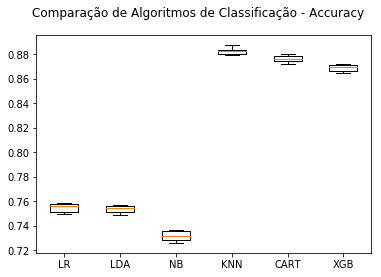

In [35]:
#Verifica com boxplot a acuracia das previsoes
fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Classificação - Accuracy')
ax = fig.add_subplot(111)
plt.boxplot(resul_df.test_accuracy)
ax.set_xticklabels(nomes)
plt.show()

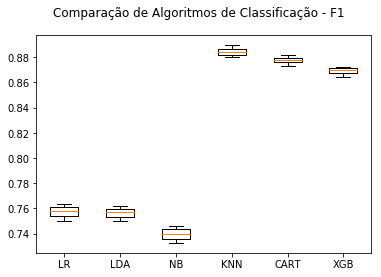

In [36]:
#Verifica com boxplot a acuracia das previsoes
fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Classificação - F1')
ax = fig.add_subplot(111)
plt.boxplot(resul_df.test_f1)
ax.set_xticklabels(nomes)
plt.show()

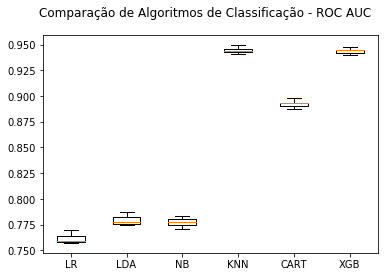

In [37]:
#Verifica com boxplot a acuracia das previsoes
fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Classificação - ROC AUC')
ax = fig.add_subplot(111)
plt.boxplot(resul_df.test_roc_auc)
ax.set_xticklabels(nomes)
plt.show()

## Ajuste de Hyperparametros

In [38]:
#Utiliza Grid Search Parameter Tuning para a selecao - KNN
valores_test = dict(
    n_neighbors = [3, 5, 11, 19],
    weights = ['uniform', 'distance'],
    metric = ['euclidean', 'manhattan']
)

modelo_knn = KNeighborsClassifier()

# Criando o grid
grid_knn = GridSearchCV(estimator = modelo_knn, param_grid = valores_test, verbose = True, n_jobs = -1)
grid_knn.fit(x_pca, Y_train)

# Print do resultado
print("Acurácia: %.3f" % (grid_knn.best_score_ * 100))
print("Melhores Parâmetros do Modelo:\n", grid_knn.best_estimator_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Acurácia: 89.616
Melhores Parâmetros do Modelo:
 KNeighborsClassifier(metric='euclidean', n_neighbors=11, weights='distance')


In [39]:
#Utiliza Grid Search Parameter Tuning para a selecao - Decison Tree Classifier
valores_test = dict(
    criterion = ['gini', 'entropy'],
    max_depth = range(1,10)
)

modelo_cart = DecisionTreeClassifier()

# Criando o grid
grid_cart = GridSearchCV(estimator = modelo_cart, param_grid = valores_test, verbose = True, n_jobs = -1)
grid_cart.fit(x_pca, Y_train)

# Print do resultado
print("Acurácia: %.3f" % (grid_cart.best_score_ * 100))
print("Melhores Parâmetros do Modelo:\n", grid_cart.best_estimator_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Acurácia: 84.546
Melhores Parâmetros do Modelo:
 DecisionTreeClassifier(criterion='entropy', max_depth=9)


In [41]:
#Utiliza Grid Search Parameter Tuning para a selecao - XGBoost
valores_test = dict (
    missing          = [np.nan],
    max_depth        = [4, 5, 6], 
    n_estimators     = [340, 350, 360], 
    learning_rate    = [0.03], 
    nthread          = [4], 
    subsample        = [0.94, 0.95], 
    colsample_bytree = [0.85], 
    seed             = [100]
)

modelo_xgb = XGBClassifier()

# Criando o grid
grid_xgb = GridSearchCV(estimator = modelo_xgb, param_grid = valores_test, verbose = True, n_jobs = -1)
grid_xgb.fit(x_pca, Y_train)

# Print do resultado
print("Acurácia: %.3f" % (grid_xgb.best_score_ * 100))
print("Melhores Parâmetros do Modelo:\n", grid_xgb.best_estimator_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Acurácia: 85.478
Melhores Parâmetros do Modelo:
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.85, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.03, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=360, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=100, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=100, subsample=0.95, tree_method='exact',
              validate_parameters=1, verbosity=None)


O KNN obteve melhor desempenho, ela será utilizado.

## Teste do modelo em uma pipeline

In [42]:
#scaler = MinMaxScaler(feature_range = (0, 1))
modelo = grid_knn.best_estimator_
modelo.fit(x_pca, Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11, weights='distance')

In [43]:
pipe = Pipeline([('scaler', scaler), ('pca', pca),('knn', modelo)] )

In [44]:
predict = pipe.predict(X_test)

In [45]:
print(confusion_matrix(Y_test, predict))
print(classification_report(Y_test, predict))

[[17955  2539]
 [ 1480 19065]]
              precision    recall  f1-score   support

           0       0.92      0.88      0.90     20494
           1       0.88      0.93      0.90     20545

    accuracy                           0.90     41039
   macro avg       0.90      0.90      0.90     41039
weighted avg       0.90      0.90      0.90     41039



Obtivemos 90% de acurácia com os dados de teste.

## Salvando o resultado 

In [46]:
arquivo = 'modelo_classificador_final.sav'
pickle.dump(pipe, open(arquivo, 'wb'))
print("Modelo salvo!")

Modelo salvo!


In [47]:
modelo_classificador_final = pickle.load(open(arquivo, 'rb'))
modelo_prod = modelo_classificador_final.predict(X_test)
print(classification_report(Y_test, modelo_prod))
print("Modelo carregado!")

              precision    recall  f1-score   support

           0       0.92      0.88      0.90     20494
           1       0.88      0.93      0.90     20545

    accuracy                           0.90     41039
   macro avg       0.90      0.90      0.90     41039
weighted avg       0.90      0.90      0.90     41039

Modelo carregado!
